# Jupiter's Moons Analysis (Task 1)

### Introduction:
In this notebook, we will explore and analyse the dataset of Jupiter's moons. Jupiter, the largest planet in our Solar System, is known for having a large number of moons, each with unique characteristics and orbital properties. Our analysis aims to discover insights into these moons, by using the `Moons` class from the `jupiter.py` module, specifically developed for this purpose.

The dataset includes various attributes of the moons such as their orbital period, distance from Jupiter, physical dimensions, and more. Through this analysis, we hope to understand more about these celestial bodies and their relationships with Jupiter.

### Loading the data
To load the data, we import the "Moons" class from the "jupiter.py" model, and we create a database path to load the database here

In [1]:
from jupiter import Moons

In [2]:
db_path = "data/jupiter.db"
moons_data = Moons(db_path)

### Dataset Structure
Let's discuss the overall structure of our dataset. We'll look into the number of fields and records to get a sense of its size and scope.


In [3]:
# Display the shape of the dataset
num_records, num_fields = moons_data.data.shape
print(f"The dataset contains {num_records} records and {num_fields} fields.")


The dataset contains 56 records and 9 fields.


### Checking Data Completeness
To ensure the reliability of our analysis, it's important to check for missing values in the dataset. The `check_completeness` method helps us identify if there are any gaps in our data.


In [4]:
# Check for missing values in the dataset
moons_data.completeness()


moon                0
period_days         0
distance_km         0
radius_km           0
mag                 3
mass_kg            50
group               0
ecc                 0
inclination_deg     0
dtype: int64

It seems that there are 3 empty data from the "mag" column, and 50 missing data from the mass_kg column, so we are notified of the missing values before we proceed to the next step


### Summary Statistics
Let's start by looking at the summary statistics of the dataset. This will give us a good overview of the numerical attributes of Jupiter's moons.


In [5]:
# Display summary statistics
moons_data.summary_statistics()

,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
count,56.000000,5.600000e+01,56.000000,53.000000,6.000000e+00,56.000000,56.000000
mean,525.998146,1.775655e+07,158.969643,20.418302,6.551798e+22,0.222922,113.571607
std,272.670243,8.253688e+06,557.730632,4.926587,6.010469e+22,0.126899,64.562822
min,0.290000,1.280000e+05,1.000000,4.610000,2.080000e+18,0.000200,0.030000
25%,258.750000,1.170252e+07,1.500000,20.800000,1.200276e+22,0.159201,30.582500
50%,632.500000,2.129009e+07,2.000000,22.500000,6.865891e+22,0.228000,148.600000
75%,725.500000,2.336375e+07,11.562500,23.000000,1.030252e+23,0.298858,159.175000
max,787.000000,2.458309e+07,2634.100000,23.700000,1.481900e+23,0.611016,166.200000


According to the summary statistics, we can obtain many information about these moons, such as the mean, minimum and maximum value of these attributes. There's a lot of things we can derive from these statistics. For example:

#### 1) "period_days" (Orbital period of moons in days)
The orbital periods of the moon are vastly different from each other, from as minimum as 0.29 days to 787 days, showing diversity in orbital dynamics.

#### 2) "distance_km" (Distance of moons from Jupiter in km)
Range of distances in kilometers are from 128000 km to 24583090 km, highlighting the huge distribution of the moons around Jupiter. A high standard deviation of 8.25 million km indicates the moon are spread out over a large range of distances from Jupiter.

#### 3) "radius_km" (Radius of moons)
Radius of the moons varies from 1 km to 2634.1 km, showing that moons have variety in size. The mean (approximately 159 km) is much closer to the minimum, indicating that most moons are relatively small compared to the large ones

From these analytics, we can conclude that there's a significant diversity in orbital periods, distances, and radius, indicating a complex system of moons with varied orbital characteristics and different sizes.


### Correlation Analysis
Understanding how different numerical attributes of the moons correlate with each other can provide valuable insights. We use the `correlation` method for this purpose. Additionally, we'll visualise these correlations using a heatmap.


/home/jovyan/PDA/Assessment 1/jupiter.py:61: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = self.data.corr()


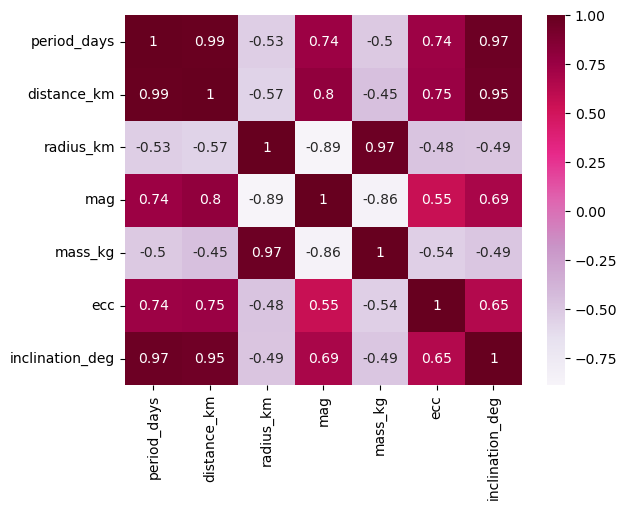

,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
period_days,1.000000,0.991521,-0.534434,0.742646,-0.504430,0.737181,0.969493
distance_km,0.991521,1.000000,-0.567266,0.799187,-0.453339,0.750819,0.953873
radius_km,-0.534434,-0.567266,1.000000,-0.887393,0.968379,-0.478901,-0.487645
mag,0.742646,0.799187,-0.887393,1.000000,-0.861359,0.554617,0.688529
mass_kg,-0.504430,-0.453339,0.968379,-0.861359,1.000000,-0.543138,-0.489378
ecc,0.737181,0.750819,-0.478901,0.554617,-0.543138,1.000000,0.645961
inclination_deg,0.969493,0.953873,-0.487645,0.688529,-0.489378,0.645961,1.000000


In [6]:
moons_data.correlation(visualise = True)

Before we delve into the correlation analysis, let's understand what correlation values are:

#### Understanding correlation values

- A correlation value close to +1 indicates a strong positive relationship.
- A value close to -1 indicates a strong negative relationship.
- Values near 0 suggest little to no linear relationship.

Now we analyse each of the correlations:

#### 1. "period_days" and "distance_km" (0.991521)
A value of 0.991521 indicates a very strong positive relationship between these two characteristics, in a way suggests that moons that are far from Jupiter have longer orbital periods. According to Kepler's Third Law, the square of a planet's orbital period, T, is proportional to the cube of the length of the semi-major axis, a, of its orbit, which is consistent with the correlation we obtained.

#### 2. "radius_km" and "mass_kg" (0.96837)
This very high value of correlation (0.96837) suggests that larger moons have larger mass, which is expected as larger bodies generally have greater volumes and higher mass. 

#### 3. "radius_km" and 'mag' (-0.887393)
This negative value indicates that radius and magnitude has negative relationship. This suggests that larger-sized moons have lower magnitudes, meaning that they appear brighter from the observer in Earth. Since magnitude in astronomy is inversely related to brightness, this makes sense - larger moons reflecting more light could appear brighter.

#### Key takeaways
- The strong correlation between orbital period and distance from Jupiter aligns well with Kepler's Third Law.
- Larger and more massive moons tend to be brighter, as indicated by their negative correlation with magnitude.





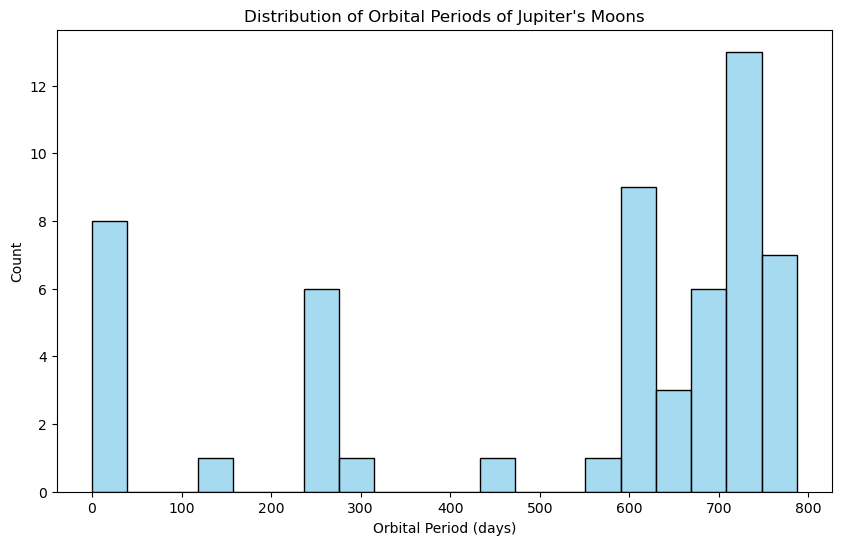

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=moons_data.data, x='period_days', bins=20, color='skyblue')
plt.title('Distribution of Orbital Periods of Jupiter\'s Moons')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Count')
plt.show()

### Retrieving Data for a Specific Moon
If we want to focus our analysis on a specific moon, we can use the `get_moon_data` method. Let's retrieve data for the moon "Ganymede".This moon is particularly interesting because it's not only the largest moon of Jupiter but also the largest moon in the entire Solar System. It's even larger than the planet Mercury.


In [7]:
# Retrieve data for "Ganymede"
moons_data.get_moon_data('Ganymede')


,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
24,Ganymede,7.15,1070400.0,2634.1,4.61,1.481900e+23,Galilean,0.0013,2.2


### Analysis of Ganymede

#### 1. Orbital Period (period_days)
With an orbital period spanning only 7.15 days, Ganymede completes its journey around Jupiter relatively quickly, especially when you consider its distance from the planet.

#### 2. Proximity to Jupiter (distance_km)
Ganymede orbits at a distance of about 1,070,400 kilometers from Jupiter. This substantial distance places it among the Galilean moons, a group characterized by their large sizes and significant distances from Jupiter.

#### 3. Orbital Shape (ecc)
The orbital eccentricity of Ganymede is measured at a mere 0.0013, indicating that its path around Jupiter is almost a perfect circle, with only a slight deviation.

#### 4. Orbital Tilt (inclination_deg)
The inclination of Ganymede’s orbit is just 2.2 degrees. This suggests that its orbit aligns closely with the equatorial plane of Jupiter, implying only a minor angular deviation.






### Scatter Plot between variables

The distribution of these moons in the scatter plot can provide insights into the dynamics of the Jupiter system. The distinct distances and orbital periods reflect the complex gravitational interactions and historical formation scenarios of the moons. Let's create a scatter plot for plotting variables of distance between Jupiter and the Moons, and its orbital periods.

For simplification, we can observe Galilean moons, which are the four largest moons of Jupiter; Io, Europa, Ganymede, and Callisto. They were first observed by Galileo Galilei in 1610 and were the first objects to be found to orbit another planet. These moons are among the largest in the Solar System, with Ganymede being the largest moon overall.

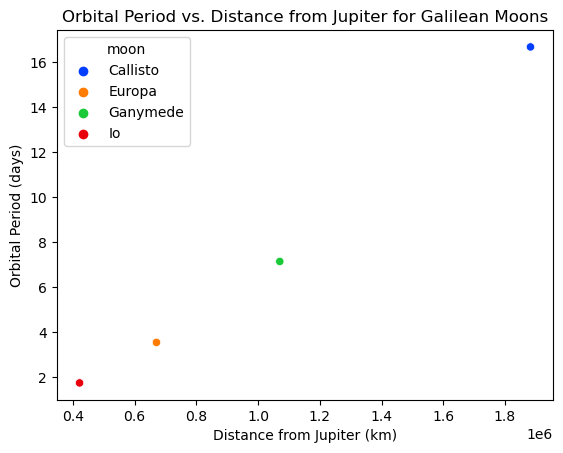

In [20]:
# Plotting for Galilean moons: Orbital Period vs Distance from Jupiter

# List of Galilean moons
galilean_moons = ['Io', 'Europa', 'Ganymede', 'Callisto']

# Filter data for only Galilean moons
filtered_data = moons_data.data[moons_data.data['moon'].isin(galilean_moons)]

# Plotting Orbital Period vs Distance from Jupiter for specified moons
moons_data.plot_scatter(
    x_column = 'distance_km',
    y_column = 'period_days',
    hue = 'moon',
    title = 'Orbital Period vs. Distance from Jupiter for Galilean Moons',
    xlabel = 'Distance from Jupiter (km)',
    ylabel = 'Orbital Period (days)',
    data = filtered_data  # Use the filtered data for Galilean moons
)

#### Orbital Period and Distance Correlation:

The scatter plot would typically show a positive correlation between the distance of each Galilean moon from Jupiter and its orbital period. This trend is consistent with Kepler's Third Law, which states that the square of the orbital period is proportional to the cube of the semi-major axis of the orbit.

#### Unique Characteristics of Each Moon:

###### Io:
Being the closest to Jupiter, Io has the shortest orbital period. The proximity of Io to Jupiter leads to significant tidal heating and volcanic activity.

###### Europa:
Slightly further out, Europa has a longer orbital period. It is notable for its potential subsurface ocean beneath a surface of ice, making it a focus of astrobiological interest.

###### Ganymede: 
As the largest moon of Jupiter, Ganymede's position in the scatter plot would reflect its status as the furthest out of the inner Galilean moons. It has a substantial magnetic field and it is also the only moon known to have its own magnetosphere.

###### Callisto:
The furthest of the Galilean moons from Jupiter, Callisto has the longest orbital period among others. It's described as having a heavily cratered surface, indicating an ancient and unaltered exterior.

# Jupiter's Mass Prediction (Task 2)

### Estimating Jupiter's Mass Using Linear Regression

We will perform the estimation process, mainly by using methods created in the 'Moons' class in the separate module "jupiter.py". 




### Preparing the data

We use 'prepare_regression_data' method to prepare our dataset to apply Kepler's Third Law in a regression analysis context.

This function executes few steps

- Initially, the orbital period of the moons ('period_days') are in days. We convert the orbital period from days to seconds.

- The distances ("distance_km") are converted from kilometers to meters

- Create new columns for T^2 and a^3








In [24]:
moons_data.prepare_regression_data()
moons_data.data.head()

,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg,T2,a3
0,Adrastea,0.298,129000.0,8.2,NaN,NaN,Inner,0.001500,0.03,6.629183e+08,2.146689e+24
1,Aitne,730.000,23231000.0,1.5,22.7,NaN,Carme,0.264000,165.00,3.978077e+15,1.253729e+31
2,Amalthea,0.498,181400.0,83.5,14.1,2.080000e+18,Inner,0.003190,0.37,1.851340e+09,5.969141e+24
3,Ananke,630.000,21300000.0,14.0,18.9,NaN,Ananke,0.174725,148.60,2.962843e+15,9.663597e+30
4,Aoede,761.000,24000000.0,2.0,22.5,NaN,Pasiphae,0.432000,158.00,4.323115e+15,1.382400e+31


### Linear Regression


The "train_regression_model" method is designed to train a linear regression model on the Jupiter's moons dataset. This method follows a sequence of steps to ensure the model is accurately trained and evaluated:

#### Defining Variables:

- Independent variable (a^3) : Cubed semi-major axis distances of the moons, we use for predictor/feature in our regression model

- Dependent variable (T^2) : Squared orbital periods of the moons, used for target variable, which the model will learn to predict


#### Split the dataset

- Dataset is split into 80% of training and 20% of test sets

- The use of hyperparameters 'random_state = 42' is crucial for ensuring that this split is reproducible, which allows for the same sorting of data every time the code is run

#### Training the model
- Linear regression model is initiated and trained on training data

- It learns the relationship between a^3 and T^2

#### Model evaluation
- The model's performance is evaluated using the R² score, which measures the proportion of variance in the dependent variable that is predictable from the independent variable.

- Compute R² scores for both the training and testing datasets



In [18]:
train_r2, test_r2 = moons_data.train_regression_model()
print(f"Training R² Score: {train_r2}")
print(f"Testing R² Score: {test_r2}")


Training R² Score: 0.9992622607543469
Testing R² Score: 0.9805535491912374


The high R² scores validate the use of linear regression in this context and confirms the strong linear relationship between these two variables

### Estimating the Mass of Jupiter

Now we move on to estimating the mass of Jupiter. 'The estimate_jupiter_mass' method in our Moons class is designed to estimate the mass of Jupiter using the previous linear regression model

This estimation is based on Kepler's Third Law of planetary motion, which relates the orbital period of a moon to its distance from the central planet. 


#### Regression Coefficient

We retrieve the coefficient of the linear regression model ('self.model.coef[0]'), which represents the slope of the line fitted by the regression linear model that corresponds to the relationship of the two variables.

#### Calculate Jupiter's Mass

We rearrange Kepler's equation to solve for M, the mass of Jupiter. The formula is : M = 4(pi)^2/G(coef). We insert the corresponding values, where G is the gravitational constant, and pi is the value from the NumPy library. We then obtain M, the mass of Jupiter in kg.

#### Apply method on the data

Finally we apply the method as below:
     
  

In [19]:
estimated_mass = moons_data.estimate_jupiter_mass()
print(f"Estimated Mass of Jupiter: {estimated_mass} kg")


Estimated Mass of Jupiter: 1.9023937964780354e+27 kg


 Our estimate of mass is 1.902 x 10^27 kg, which is almost close to the literature value of 1.899 x 10^27 kg.